# 🧍‍♂️🧍‍♀️ Customer Behavior Analysis

## 🎯 Objectives

This notebook explores customer behavior patterns in the e-commerce dataset. The main goals are to:

- Identify who spends more: men or women.
- Analyze which age groups spend or buy the most.
- Explore buying frequency and recency.
- Examine product category preferences by gender and age.
- Understand regional buying patterns.
- Assess if shipping outcomes impact customer behavior.

## 📦 Data Source


The data used here is the cleaned version of the original sales dataset:
- File: `../data/cleaned_orders.csv`
- Format: CSV
- Rows represent individual product orders with associated customer and order details.

## 📊 Data Loading

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load data
df = pd.read_csv("../data/cleaned_orders.csv")
df.shape
# df.info()

(810, 18)

In [7]:
# Check for nulls
# df.isna().sum()

## Analysis

In this section, different aspects of the data would be considered, showcasing orders and revenues are affected by customer behaviour, demographics, as well as shipping prices.

### 📊 1. Spending Patterns by Gender

#### Total Amounts Spent

Text(0, 0.5, 'Total Amount Spent GHS')

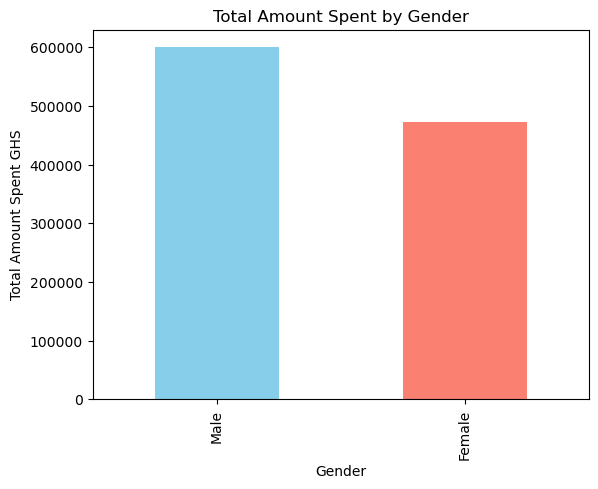

In [25]:
# Graph of total amount calc vs gender
df_total_by_gender = df.groupby("Gender")["Total Price Calc"].sum().sort_values(ascending=False)
df_total_by_gender.plot(kind="bar", color=['skyblue', 'salmon']);
plt.title("Total Amount Spent by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Amount Spent GHS")
plt.show()

It appears `Male`s spend more than `Female`s. Let's consider different aspects of their spending, and see if this still confirms the above observation.

#### Average Spending Per Order

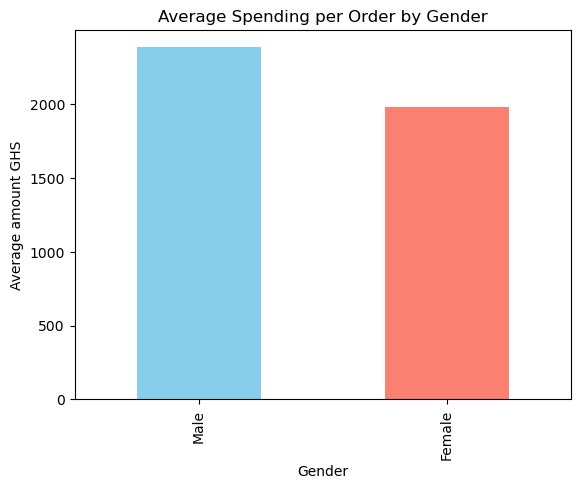

In [41]:
# Average spending per order

# Get order totals on each day for each customer
df_order_totals = df.groupby(["Order Date", "Gender"])["Total Price Calc"].sum().reset_index()

# Obtain average by `Gender`
df_avg_spend =  df_order_totals.groupby("Gender")["Total Price Calc"].mean().sort_values(ascending=False)

# Bar plot of the data
df_avg_spend.plot(kind="bar", color=['skyblue', 'salmon'])
plt.title("Average Spending per Order by Gender")
plt.ylabel("Average amount GHS")
plt.xlabel("Gender")
plt.show()


#### Spendings by Category and by Gender

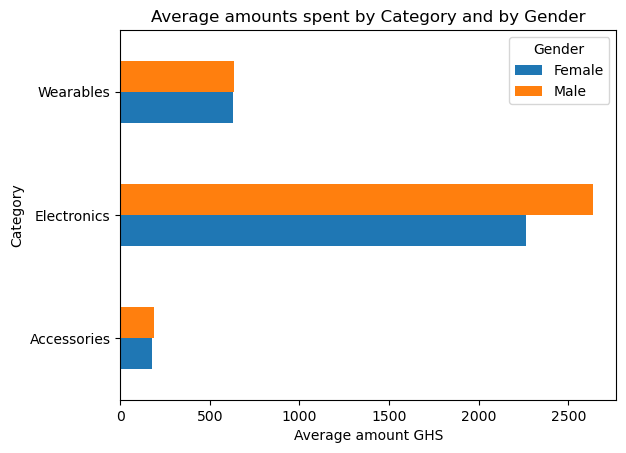

In [ ]:
# Purchasing Trends Over Categories

# Group orders by `Category` and `Gender`
df_gender_by_cat = df.groupby(["Category", "Gender"])["Total Price Calc"].mean().sort_values(ascending=False).unstack()

# Plot graph
df_gender_by_cat.plot(kind="barh")
plt.title("Average amounts spent by Category and by Gender")
plt.xlabel("Average amount GHS")
plt.ylabel("Category")
plt.show()

The above visualizations suggest that the major difference in spending btn Males and Females come from the `Electronics` product category. We dive into this to inspect more differences between the genders.

#### Deep dive into `Electronics` category

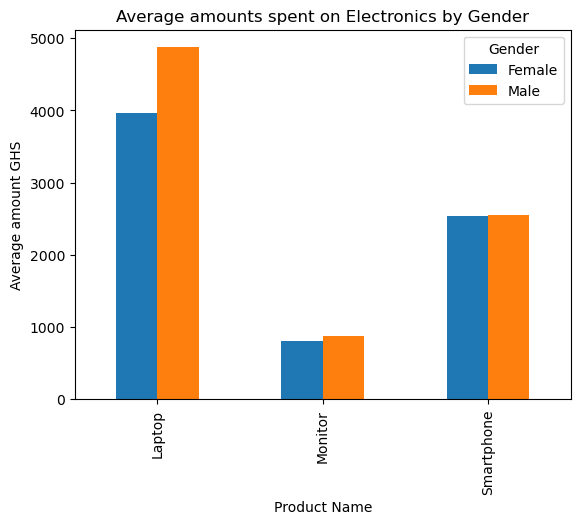

In [13]:
# Diving deeper into the electronics
df_electronics = df[df["Category"] == "Electronics"]
electronics_categories = df_electronics.groupby(by=["Product Name", "Gender"])["Total Price Calc"].mean().sort_values(ascending=False).unstack()
electronics_categories.plot(kind="bar")
plt.title("Average amounts spent on Electronics by Gender")
plt.ylabel("Average amount GHS")
plt.xlabel("Product Name")
plt.show()

#### Conclusion

The spending patterns for both `Male`s and `Female`s were generally alike. However, the main difference in amount spent driven mainly by the `Electronics` category with Males spending more than Females. Males spent over `23%` on average more than females, suggesting preference for computing devices among Male customers.

### 📊 2. Spending Patterns by Age Group

In [35]:
# Number of Orders by Age group
df["Age Group"].value_counts()

Age Group
Seniors         170
Older Adults    168
Mid-Age         153
Adults          123
Retired         106
Young Adults     90
Name: count, dtype: int64

Most orders come from the `Seniors` and `Older Adults` age groups accounting for close to `42%` with Young Adults having fewer orders (`11.1%`). Let's see if this reflects in their average spending as well.

#### Total Average Spending by Age Group

In [44]:
df.groupby(["Age Group"])["Total Price Calc"].mean().sort_values(ascending=False)

Age Group
Older Adults    1539.710937
Retired         1445.754717
Young Adults    1294.777778
Seniors         1250.198478
Adults          1210.925400
Mid-Age         1191.502647
Name: Total Price Calc, dtype: float64

Surprisingly, `Young Adults` do not spend the lowest despite having lowest number of orders. `Seniors` are towards the bottom in terms of spending but `Older Adults` are still at the top of average spending as well. Let's dig deeper.

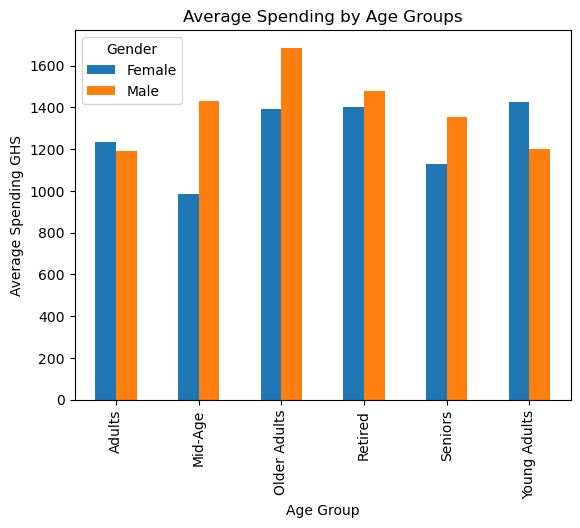

In [33]:
avg_by_age_group = df.groupby(["Age Group", "Gender"])["Total Price Calc"].mean().unstack()
avg_by_age_group.plot(kind="bar")
plt.xlabel("Age Group")
plt.ylabel("Average Spending GHS")
plt.title("Average Spending by Age Groups")
plt.show()

Males consistently have higher average spending, except for the age groups `Adults` and `Young Adults` where females have higher spendings. `Mid-Age` shows a considerable gap between Males and Females

#### Deep dive into Adults and Young Adults groups

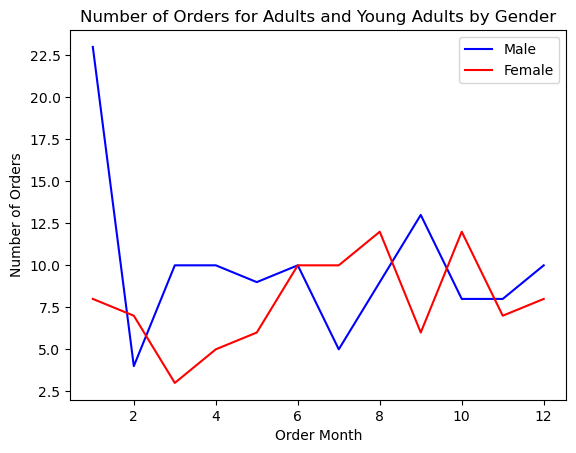

In [97]:
mask_age_group = df["Age Group"].isin(["Adults", "Young Adults"])
mask_gender_male = df["Gender"] == "Male"
mask_gender_female = df["Gender"] == "Female"
adults_young_adults_male = df[mask_age_group & mask_gender_male]
adults_young_adults_female = df[mask_age_group & mask_gender_female]

adults_young_adults_male["Order Month"].value_counts().sort_index().rename("Male").plot(kind="line", color="blue", legend=True)
adults_young_adults_female["Order Month"].value_counts().sort_index().rename("Female").plot(kind="line", color="red", legend=True)
plt.xlabel("Order Month")
plt.ylabel("Number of Orders")
plt.title("Number of Orders for Adults and Young Adults by Gender")
plt.show()


Males in the Young Adults and Adults age groups start the year off with very large number of orders. A very sharp decline occurs in February (about `83%`) and the following months show decent fluctuations except in July where it reduces sharply and September where it rises by `160%` from August.

Females in these age groups on the other hand, start the year with few orders from January to March, at which they record a minimum number of orders. There is an increase in number of orders each month until September where there is a sharp drop in number of orders.

#### Deep dive into Mid-Age, Older Adults

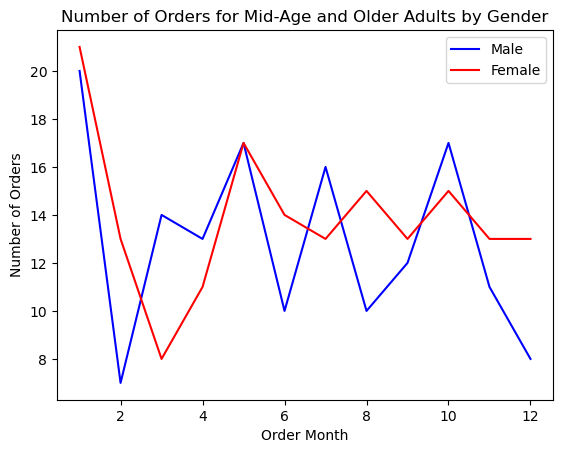

In [98]:
# Create filter masks
mask_age_group = df["Age Group"].isin(["Mid-Age", "Older Adults"])
mask_gender_male = df["Gender"] == "Male"
mask_gender_female = df["Gender"] == "Female"

# Obtain separate data for Mid-Age and Older Adults by gender
mid_older_adults_male = df[mask_age_group & mask_gender_male]
mid_older_adults_female = df[mask_age_group & mask_gender_female]

mid_older_adults_male["Order Month"].value_counts().sort_index().rename("Male").plot(kind="line", color="blue", legend=True)
mid_older_adults_female["Order Month"].value_counts().sort_index().rename("Female").plot(kind="line", color="red", legend=True)
plt.xlabel("Order Month")
plt.ylabel("Number of Orders")
plt.title("Number of Orders for Mid-Age and Older Adults by Gender")
plt.show()

Mid-Age and Older Adults order similar quantities of products only in January and May (where they make equal number of orders). However, orders by both Males and Females fluctuate sharply every month with visible alternating patterns showing an increase in number of orders for one month, followed by a decline in the next month and so on. However, fluctuations are sharper in Males than in Females.


#### Total Spending per order

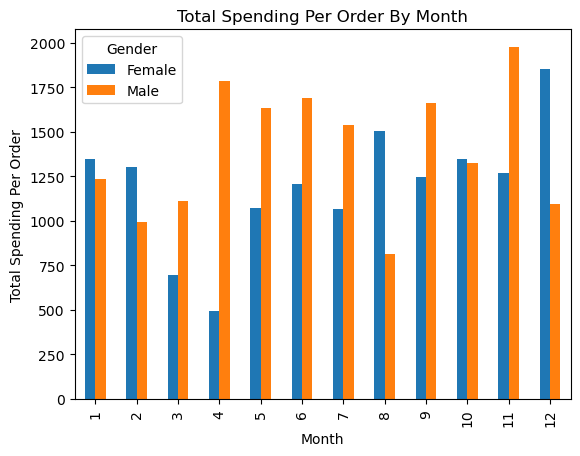

In [ ]:
fields= ["Order Date",  "Gender", "Shipping Fee", "Total Price Calc", "Order Month"]
spo = df[fields].copy()
spo["Total"] = spo["Total Price Calc"] + spo["Shipping Fee"]

# Obtain average spending per order by Gender
avg_spo = spo.groupby(["Order Month", "Gender"])["Total"].mean().unstack()
# .set_index("Order Month")
avg_spo.head()
avg_spo.plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Total Spending Per Order")
plt.title("Total Spending Per Order By Month")
plt.show()

Males typically spend more per order than Females especially during the middle of the year and in November. Females spend more than males in December and the first two months of every new year. We dive deeper into these trends to unlock more insights. 

#### Female spendings in December, January and February

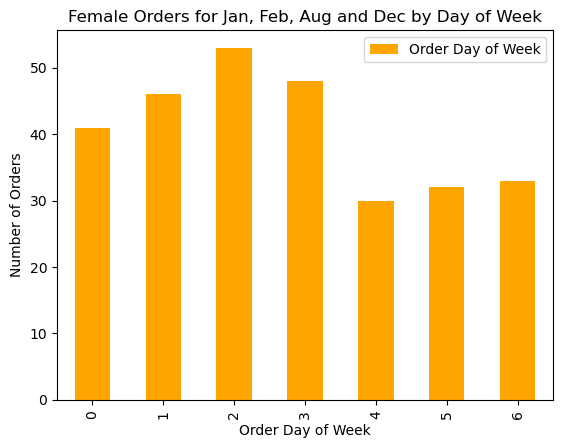

In [50]:
# Obtain info for December, January, February and August
mask_month = df["Order Month"].isin([1, 2, 8, 12]) 
mask_gender = df["Gender"] == "Female"
dec_jan_feb = df[mask_month].sort_values(by="Order Month", ascending=True)

# Plotting sales distribution across the week
dec_jan_feb.groupby(by="Order Day of Week")["Order Day of Week"].count().plot(kind="bar", color="orange", legend=True)
plt.xlabel("Order Day of Week")
plt.ylabel("Number of Orders")
plt.title("Female Orders for Jan, Feb, Aug and Dec by Day of Week")
plt.show()

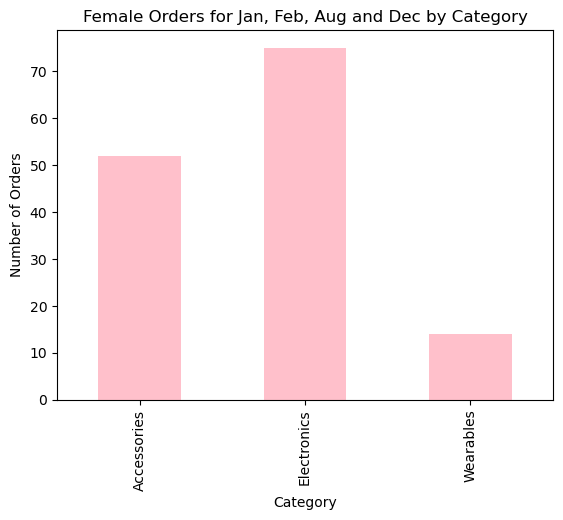

In [ ]:
# Plotting order distribution across categories
dec_jan_feb.groupby(by="Category")["Category"].count().plot(kind="bar", color="pink")
plt.xlabel("Category")
plt.ylabel("Number of Orders")
plt.title("Female Orders for Jan, Feb, Aug and Dec by Category")
plt.show()

Most female orders with highest spendings per order were mostly in the months of December and August, and also in the first months of the year. Most orders were Mondays,Tuesdays and Wednesdays, indicating days of highest spending within the week. Accessories and Electronics are the most selling categories, accounting for `92.5%` of Female orders within the period.

#### Male Spendings in selected months

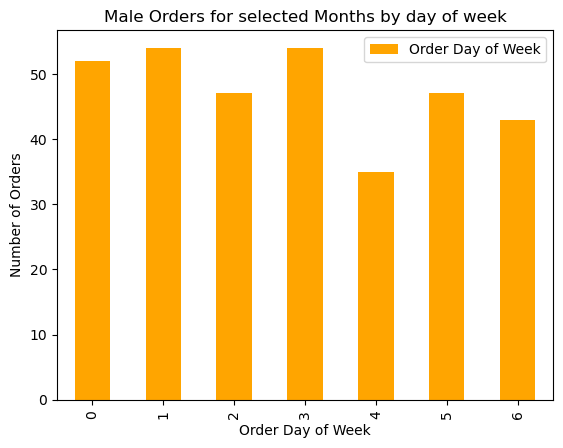

In [ ]:
# Obtain info for selected months
mask_month = df["Order Month"].isin([4,5,6,7,11]) 
mask_gender = df["Gender"] == "Female"
selected_months = df[mask_month].sort_values(by="Order Month", ascending=True)

# Plotting sales distribution across the week
selected_months.groupby(by="Order Day of Week")["Order Day of Week"].count().plot(kind="bar", color="orange", legend=True)
plt.xlabel("Order Day of Week")
plt.ylabel("Number of Orders")
plt.title("Male Orders for selected Months by day of week")
plt.show()

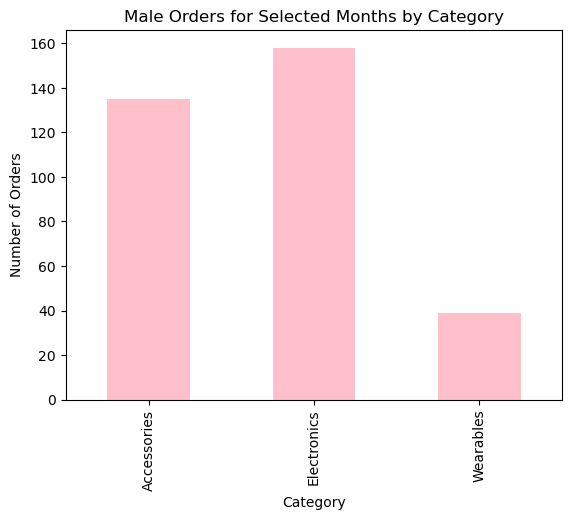

In [5]:
# Plotting sales distribution across the week
selected_months.groupby(by="Category")["Category"].count().plot(kind="bar", color="pink")
plt.xlabel("Category")
plt.ylabel("Number of Orders")
plt.title("Male Orders for Selected Months by Category")
plt.show()

For males, higher spendings per order were most sharply noticed in November and April, with months like June and September also recording higher spendings. All the days in the week generally recorded high number of orders except with Thursdays being the day of lowest ordering activity, accounting for about `10.5%` of male orders within the period. 
Although Spendings per category within this period is similar to that of Females, the wearables was a slightly larger propertion of male orders `12.5%` compared to the females `7.5%`


### 📊 3. Frequency & Recency

### 📊 4. Region-Based Insights

#### Number of Orders Per Region

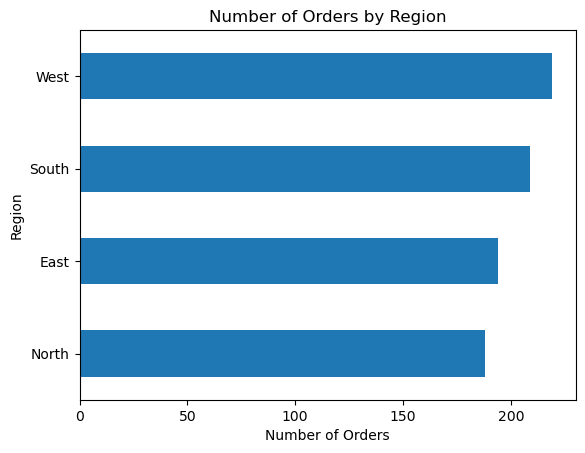

In [101]:
# Plot Number of Orders By Region
df["Region"].value_counts().sort_values().plot(kind="barh")
plt.xlabel("Number of Orders")
plt.title("Number of Orders by Region")
plt.show()


All four regions indicate a large number of orders with West and South Regions being the highest, indicating the most customer activity. Let's see if this results hold for the revenue each region generates

#### Total Revenue Per Region

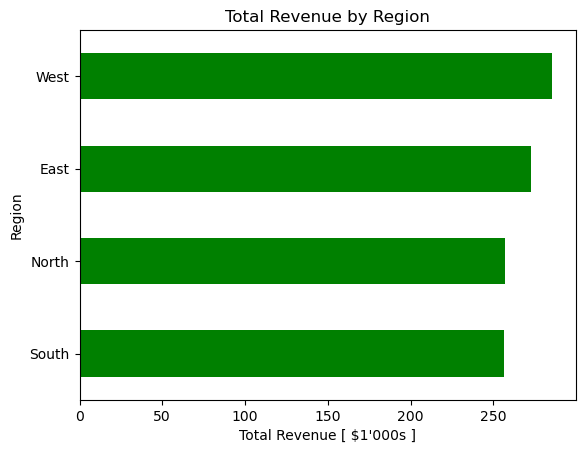

In [123]:
# Plot revenue generated by each region
(df.groupby("Region")["Total Price Calc"].sum() /1e3) .sort_values().plot(kind="barh", color="green")
plt.xlabel("Total Revenue [ $1'000s ]")
plt.title("Total Revenue by Region")
plt.show()

All regions generated averagely high revenues with `West` being the highest accounting for about `27%` of the total revenue. However, highest number of orders do not directly translate to highest total revenue as shown by the remaining three regions.

#### Region Performance over time

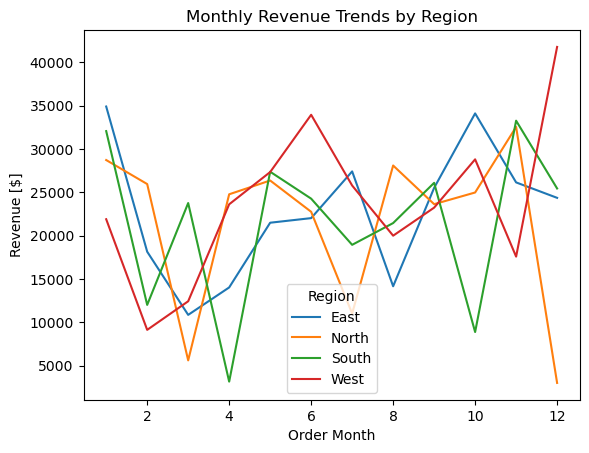

In [76]:
# Distribution of Revenue By Region over time.
df.groupby(by=["Order Month", "Region"])["Total Price Calc"].sum().unstack().plot(kind="line")
plt.ylabel("Revenue [$]")
plt.title("Monthly Revenue Trends by Region")
plt.show()


#### Average Order Value Per Region

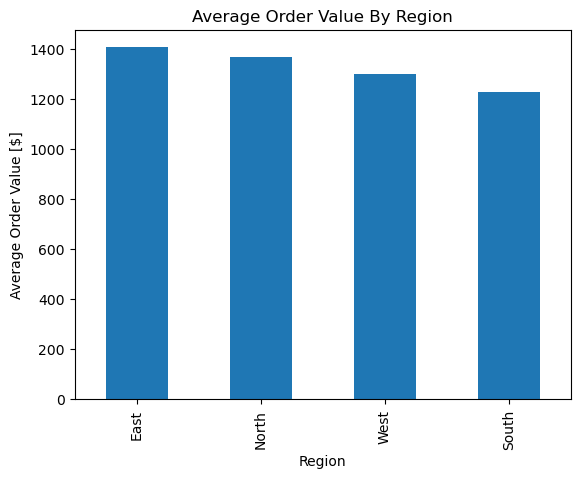

In [138]:
df.groupby("Region")["Total Price Calc"].mean().sort_values(ascending=False).plot(kind="bar")
plt.ylabel("Average Order Value [$]")
plt.title("Average Order Value By Region")
plt.show()

Customers spend the most per order in the East Region. However, from previous visualizations it doesn't generate the most total revenue. South has both lowest average spending and revenue generated. The West which leads in revenue has a moderate average spending compared to the North and East regions.

#### Category Per Region

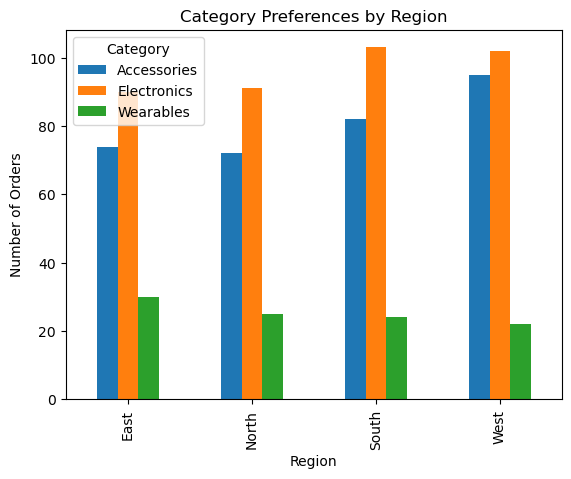

In [29]:
# Distribution of Product Categories Per Region
df.groupby(by=["Region", "Category"]).size().unstack().plot(kind="bar")
plt.ylabel("Number of Orders")
plt.title("Category Preferences by Region")
plt.show()


Electronics sells the highest in all four regions, with South and West being those with the largest sales of Electronics. Wearables are generally not sought after in any of the three regions and this is very indicative of customer preferences. West with the highest total revenue also has the highest orders of Accessories. This indicates a balance of both product categories in this region.

#### Distribution of Gender By Region (where do most males and females buy at)

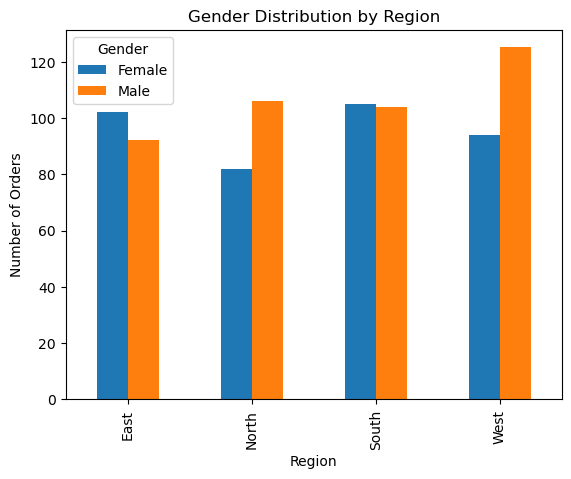

In [45]:
# Orders Distribution by Gender by Region
df.groupby(by=["Region", "Gender"]).size().unstack().plot(kind="bar")
plt.ylabel("Number of Orders")
plt.title("Gender Distribution by Region")
plt.show()

West Region has a remarkably larger number of orders from Males. Is this indicative of why it has the highest revenue?

#### Shipping Efficiencies By region

<Axes: xlabel='Region'>

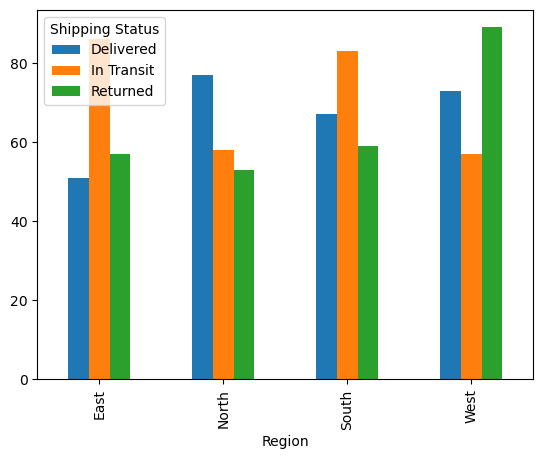

In [56]:
df.groupby(by=["Region", "Shipping Status"]).size().unstack().plot(kind="bar")

East and South Regions have the most number of orders `In Transit` indicating shipping delays. This indicates a room for improvement in Shipping to reach customers to improve revenues. Also, the West has the highest number of returned orders (`34.5%`). This may mean products that are shipped to the West region are defective or that this store has an effective return policy, improving customer satisfaction and increasing future sales volume.

### 📊 5. Shipping Status vs Customer Spend

#### Total Spending by shipping status

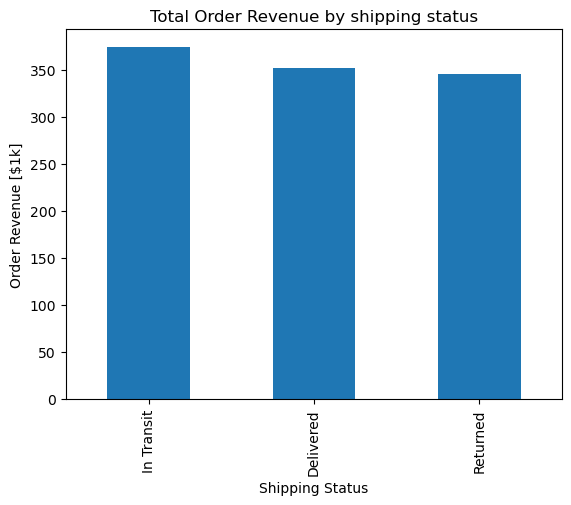

In [93]:
# Distribution of Order Revenue by shipping status
(df.groupby("Shipping Status")["Total Price Calc"].sum() / 1e3).sort_values(ascending=False).plot(kind="bar")
plt.ylabel("Order Revenue [$1k]")
plt.title("Total Order Revenue by shipping status")
plt.show()

Most revenue from orders are either not realized or are lost due to most of the orders being `In Transit` or returned by customers. With only about `32.8%` of the order revenue being successfully obtained, more than 67% of the revenue is locked up probably owing to poor product conditions and shipment delays.

#### Average Spending per order by shipping status

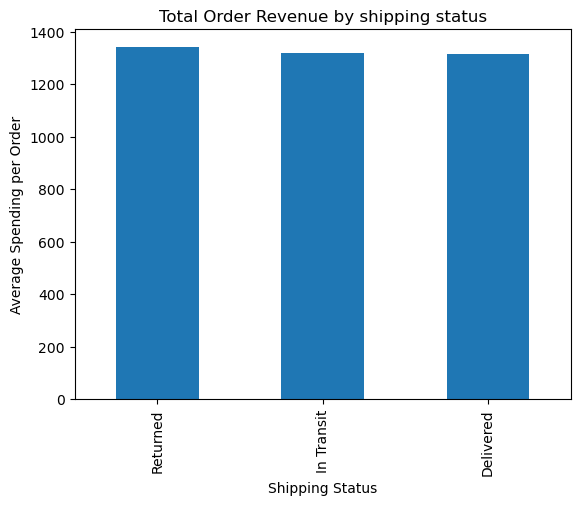

In [94]:
(df.groupby("Shipping Status")["Total Price Calc"].mean()).sort_values(ascending=False).plot(kind="bar")
plt.ylabel("Average Spending per Order")
plt.title("Total Order Revenue by shipping status")
plt.show()

Orders that are `In Transit` or end up being `Returned` have higher average spendings compared to those that are successfully delivered. A total amount of approximately (`$2,658`) is lost averagely per order due to non delivery of such orders. This represents a huge concern that needs to be tackled.

#### Number of Orders by Shipping status

In [101]:
df["Shipping Status"].value_counts()

Shipping Status
In Transit    284
Delivered     268
Returned      258
Name: count, dtype: int64

Only about 33% (by number of orders) of orders are successfully delivered, indicating logistic and / or product quality issues.

#### Shipping Status by Age group or Region

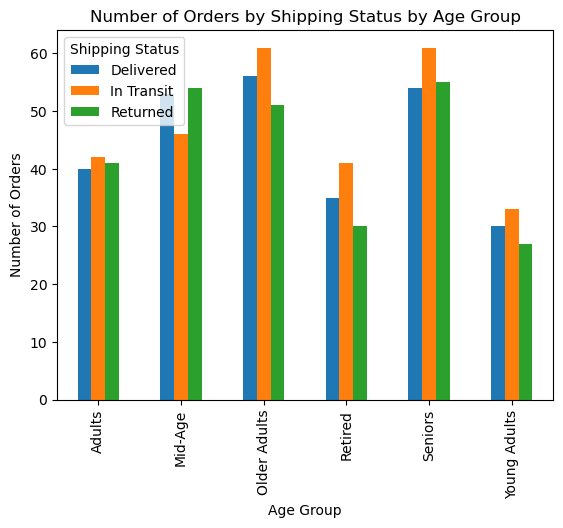

In [117]:
# Distribution of Shipping Status over Age Groups
df.groupby(by=["Age Group", "Shipping Status"]).size().unstack().plot(kind="bar")
plt.ylabel("Number of Orders")
plt.title("Number of Orders by Shipping Status by Age Group")
plt.show()

`Older Adults` and `Seniors` age groups have the largest number of orders that are successfully delivered, in transit and also returned orders. This generally indicates high customer activity in those age groups, making them suitable targets for policy changes and customer engagement.

A similar observation can be seen for the `Middle Age` age group. Let's see how observations hold per region.

#### Shipping Status by Region

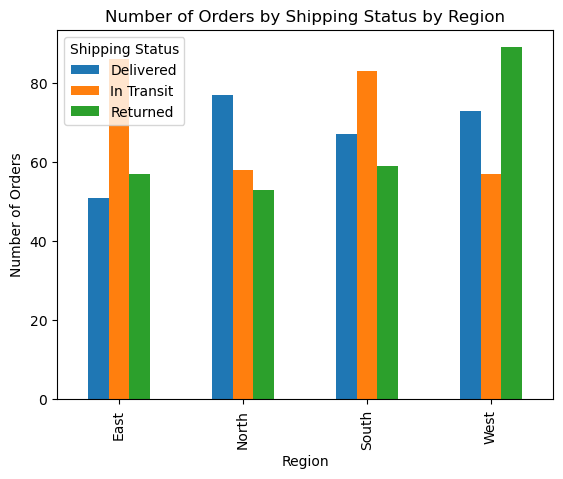

In [118]:
# Distribution of Shipping Status over Region
df.groupby(by=["Region", "Shipping Status"]).size().unstack().plot(kind="bar")
plt.ylabel("Number of Orders")
plt.title("Number of Orders by Shipping Status by Region")
plt.show()

High numbers of `In Transit` orders for the East and South regions indicate a possible prevalent issue, causing significant delays in shipping and orders completion. The `North` region has the most orders delivered and this may indicate successful CRM, good products and effective promotions overall.

#### Shipping Status by Gender

#### Check if high paying customers are affected by shipping delays

#### Segment by spending and see how each group is affected by shipping

## 📌Summary of Insights

## 📝 Usage Information

This notebook is open for educational and non-commercial use.
Feel free to reuse, modify, or reference this work as part of your learning or projects.